<div class="one">
  <h1>Classification</h1>
</div>
<style>
  div{
    background-color: SkyBlue;
  }
  h1 {
  position: relative;
  padding: 0;
  margin: 0;
  font-family: "Raleway", sans-serif;
  font-weight: 300;
  font-size: 40px;
  color: #080808;
  -webkit-transition: all 0.4s ease 0s;
  -o-transition: all 0.4s ease 0s;
  transition: all 0.4s ease 0s;
}
h1 span {
  display: block;
  font-size: 0.5em;
  line-height: 1.3;
}
h1 em {
  font-style: normal;
  font-weight: 600;
}
/* === HEADING STYLE #1 === */
.one h1 {
  text-align: center;
  text-transform: uppercase;
  padding-bottom: 5px;
}
.one h1:before {
  width: 28px;
  height: 5px;
  display: block;
  content: "";
  position: absolute;
  bottom: 3px;
  left: 50%;
  margin-left: -14px;
  background-color: #b80000;
}
.one h1:after {
  width: 100px;
  height: 1px;
  display: block;
  content: "";
  position: relative;
  margin-top: 25px;
  left: 50%;
  margin-left: -50px;
  background-color: #b80000;
}
</style>

## Steel plate 2탄




In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from optuna.samplers import TPESampler
import pickle
from IPython.core.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

warnings.filterwarnings('ignore')

In [2]:
df_submission = pd.read_csv("../data/sample_submission.csv")
df_test = pd.read_csv("../data/test.csv")
df_train = pd.read_csv("../data/train.csv")

In [3]:
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
warnings.simplefilter('ignore')

df_train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [4]:
features = list(df_train.columns[1:])

In [5]:
original_train = pd.read_csv("../data/Faults.NNA", sep="\t", names=features)

original_train.to_csv("../data/Steel Plates Faults.csv", index=False)
print(original_train.shape)
original_train.head()

(1941, 34)


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [6]:
submission_id = df_test['id']
df_train.drop('id', axis=1, inplace=True)
df_test.drop('id', axis=1, inplace=True)

In [7]:
train = pd.concat([df_train, original_train])
train.shape

(21160, 34)

In [8]:
train.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
X_Minimum,21160.000000,697.130057,532.054574,0.000000,50.000000,754.000000,1145.000000,1705.000000
X_Maximum,21160.000000,741.392202,501.160090,4.000000,214.000000,772.000000,1161.000000,1713.000000
Y_Minimum,21160.000000,1831495.305388,1892921.746275,6712.000000,639490.000000,1378585.000000,2339627.000000,12987661.000000
Y_Maximum,21160.000000,1828638.561484,1886265.963404,6724.000000,639507.000000,1378261.000000,2336466.250000,12987692.000000
Pixels_Areas,21160.000000,1703.240832,3884.800851,2.000000,88.000000,169.000000,659.000000,152655.000000
X_Perimeter,21160.000000,97.140737,192.510008,2.000000,15.000000,25.000000,67.000000,10449.000000
Y_Perimeter,21160.000000,65.852457,161.187566,1.000000,14.000000,24.000000,62.000000,18152.000000
Sum_of_Luminosity,21160.000000,193173.591115,448934.786321,250.000000,9778.000000,18402.000000,68416.000000,11591414.000000
Minimum_of_Luminosity,21160.000000,84.784594,29.121342,0.000000,68.000000,90.000000,105.000000,203.000000
Maximum_of_Luminosity,21160.000000,128.789225,14.672936,37.000000,124.000000,127.000000,135.000000,253.000000


In [9]:
train.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [10]:
df_test.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [11]:
train.duplicated().sum()

0

In [12]:
df_test.duplicated().sum()

0

In [13]:
X = train.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis=1)
X = pd.get_dummies(X, drop_first=True, dtype=int)
test = pd.get_dummies(df_test, drop_first=True, dtype=int)

X.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998


In [14]:
y = train[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

y.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21160 entries, 0 to 1940
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              21160 non-null  int64  
 1   X_Maximum              21160 non-null  int64  
 2   Y_Minimum              21160 non-null  int64  
 3   Y_Maximum              21160 non-null  int64  
 4   Pixels_Areas           21160 non-null  int64  
 5   X_Perimeter            21160 non-null  int64  
 6   Y_Perimeter            21160 non-null  int64  
 7   Sum_of_Luminosity      21160 non-null  int64  
 8   Minimum_of_Luminosity  21160 non-null  int64  
 9   Maximum_of_Luminosity  21160 non-null  int64  
 10  Length_of_Conveyer     21160 non-null  int64  
 11  TypeOfSteel_A300       21160 non-null  int64  
 12  TypeOfSteel_A400       21160 non-null  int64  
 13  Steel_Plate_Thickness  21160 non-null  int64  
 14  Edges_Index            21160 non-null  float64
 15  Empty_In

array([[<Axes: title={'center': 'X_Minimum'}>,
        <Axes: title={'center': 'X_Maximum'}>,
        <Axes: title={'center': 'Y_Minimum'}>,
        <Axes: title={'center': 'Y_Maximum'}>,
        <Axes: title={'center': 'Pixels_Areas'}>,
        <Axes: title={'center': 'X_Perimeter'}>],
       [<Axes: title={'center': 'Y_Perimeter'}>,
        <Axes: title={'center': 'Sum_of_Luminosity'}>,
        <Axes: title={'center': 'Minimum_of_Luminosity'}>,
        <Axes: title={'center': 'Maximum_of_Luminosity'}>,
        <Axes: title={'center': 'Length_of_Conveyer'}>,
        <Axes: title={'center': 'TypeOfSteel_A300'}>],
       [<Axes: title={'center': 'TypeOfSteel_A400'}>,
        <Axes: title={'center': 'Steel_Plate_Thickness'}>,
        <Axes: title={'center': 'Edges_Index'}>,
        <Axes: title={'center': 'Empty_Index'}>,
        <Axes: title={'center': 'Square_Index'}>,
        <Axes: title={'center': 'Outside_X_Index'}>],
       [<Axes: title={'center': 'Edges_X_Index'}>,
        <Axes

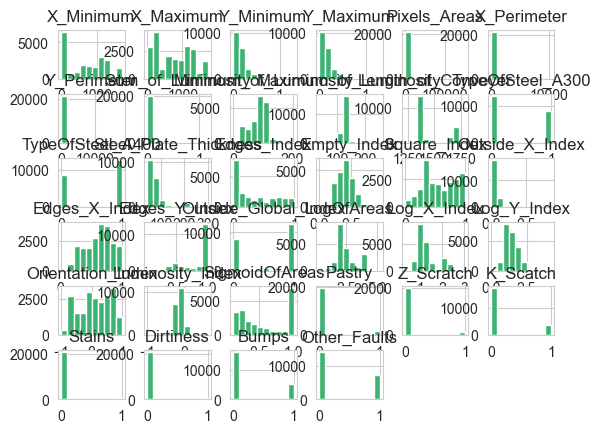

In [16]:
sns.set_style(rc={'figure.figsize':(20, 16)})
train.hist(color='#3cb371')

CPU times: total: 2.52 s
Wall time: 6.16 s


<Axes: >

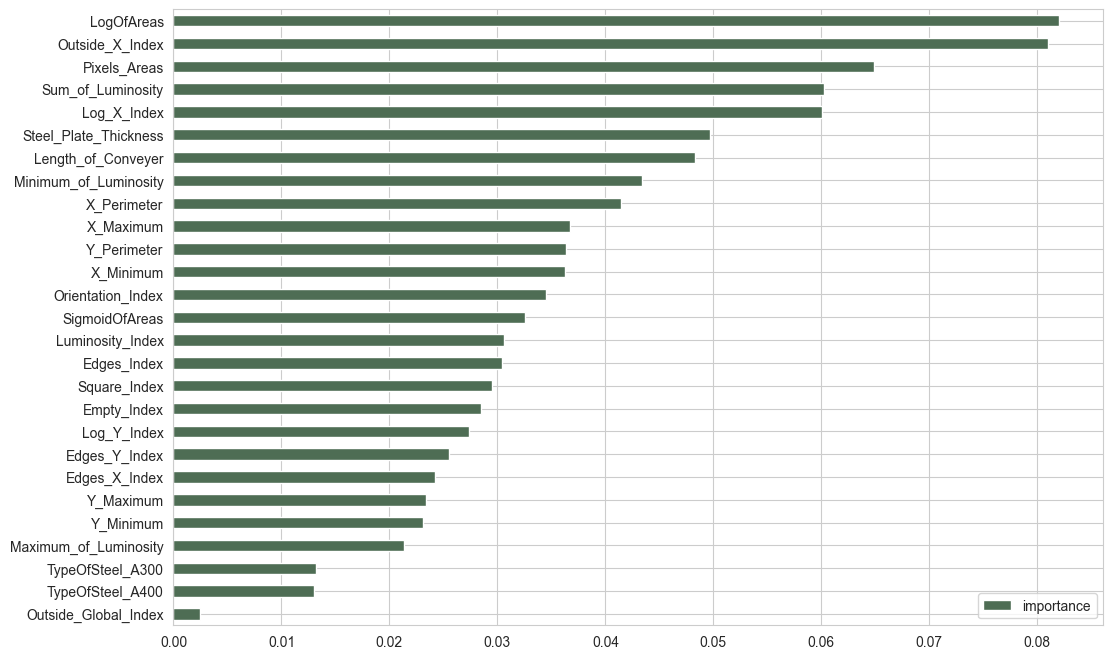

In [17]:
%%time

best_rf = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    min_samples_leaf=2,
    max_depth=15,
    min_samples_split=2,
    random_state=27
)

best_rf.fit(X, y)
importance = best_rf.feature_importances_
feature_importance = pd.DataFrame(data=importance, index=X.columns, columns=['importance']).sort_values(ascending=True, by='importance')
feature_importance.plot(kind='barh', figsize=(12, 8), color='#4e6d54')

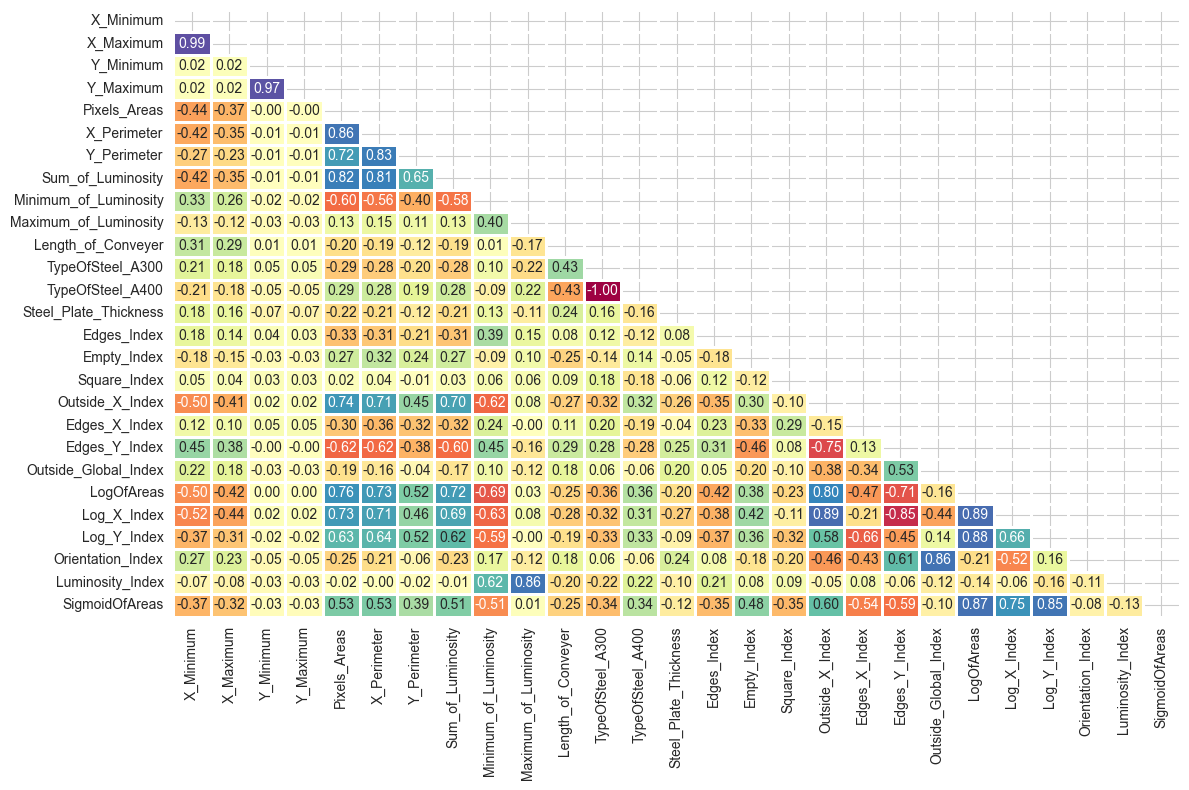

In [18]:
numeric_columns_train = X.select_dtypes(include=np.number)
corr_train = numeric_columns_train.corr(method='pearson')
mask_train = np.triu(np.ones_like(corr_train))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_train, annot=True, fmt=".2f", mask=mask_train, cmap="Spectral", cbar=None, linewidths=2)
plt.tight_layout()
plt.show()

In [19]:
to_drop = [
    'X_Minimum',
    'Y_Minimum',
    'X_Perimeter',
    'TypeOfSteel_A400',
    'Log_X_Index',
    'Log_Y_Index',
    'Orientation_Index',
    'SigmoidOfAreas',
    'Maximum_of_Luminosity'
]

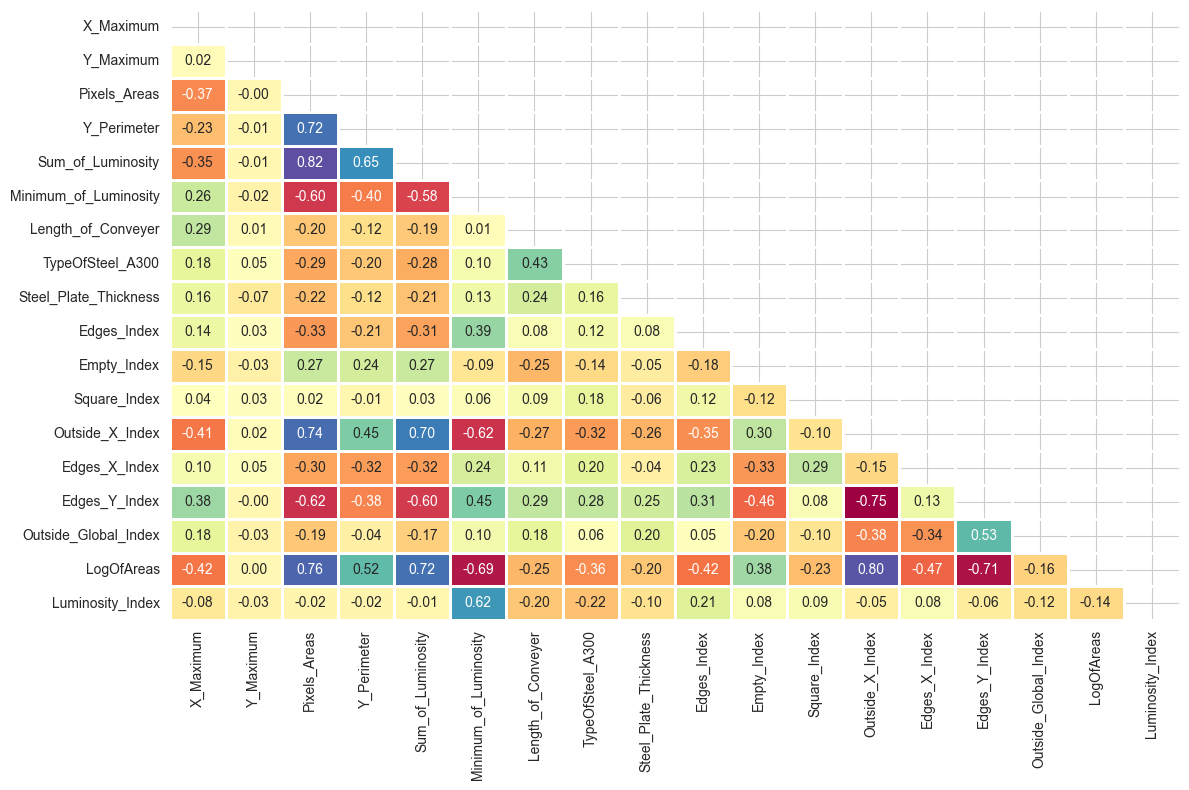

In [20]:
numeric_columns_train = X.drop(to_drop, axis=1).select_dtypes(include=np.number)
corr_train = numeric_columns_train.corr(method='pearson')
mask_train = np.triu(np.ones_like(corr_train))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_train, annot=True, fmt=".2f", mask=mask_train, cmap="Spectral", cbar=None, linewidths=2)
plt.tight_layout()
plt.show()

In [21]:
X = X.drop(to_drop, axis=1)
test = test.drop(to_drop, axis=1)

In [22]:
more_defects = y[y.sum(axis=1) == 2]
more_defects.shape[0]

21

In [23]:
y_reduced = y.drop(more_defects.index, axis=0)
X_reduced = X.drop(more_defects.index, axis=0)

In [24]:
base_models = [
    ('catboost', CatBoostClassifier(
        iterations=577,
        learning_rate=0.026083039335942488,
        colsample_bylevel=0.05706953977391527,
        min_data_in_leaf=14,
        depth=9,
        l2_leaf_reg=0.018119317452001304,
        random_state=27
    )),
    ('random_forest', RandomForestClassifier(
        n_estimators=784,
        criterion='entropy',
        min_samples_leaf=4,
        max_depth=40,
        min_samples_split=30,
        random_state=27
    )),
    ('xgboost', XGBClassifier(
        max_depth=13,
        learning_rate=0.038413233232634916,
        n_estimators=598,
        min_child_weight=10,
        gamma=1.499095706891034e-07,
        subsample=0.5577021452876274,
        colsample_bytree=0.7490229111079887,
        reg_alpha=0.0011850535504182432,
        reg_lambda=0.11761408489939623
    ))
]

In [25]:
meta_model = CatBoostClassifier(
    iterations=577,
    learning_rate=0.026083039335942488,
    colsample_bylevel=0.05706953977391527,
    min_data_in_leaf=14, 
    depth=9,
    l2_leaf_reg=0.018119317452001304,
    random_state=27
)

In [26]:
%%time
target_features = ['Pastry', "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", 'Bumps', 'Other_Faults']
predictions_proba = pd.DataFrame()

models = []

for target_column in target_features:
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
    stacking_model.fit(X, y[target_column])

    models.append(stacking_model)
    predictions_proba[target_column] = stacking_model.predict_proba(test)[:, 1]

0:	learn: 0.6624003	total: 149ms	remaining: 1m 26s
1:	learn: 0.6356683	total: 153ms	remaining: 44s
2:	learn: 0.6123064	total: 156ms	remaining: 29.8s
3:	learn: 0.5900272	total: 158ms	remaining: 22.7s
4:	learn: 0.5658426	total: 162ms	remaining: 18.6s
5:	learn: 0.5469283	total: 165ms	remaining: 15.7s
6:	learn: 0.5292457	total: 168ms	remaining: 13.7s
7:	learn: 0.5075212	total: 171ms	remaining: 12.2s
8:	learn: 0.4907071	total: 174ms	remaining: 11s
9:	learn: 0.4719475	total: 177ms	remaining: 10s
10:	learn: 0.4580609	total: 181ms	remaining: 9.3s
11:	learn: 0.4440101	total: 184ms	remaining: 8.65s
12:	learn: 0.4327390	total: 186ms	remaining: 8.08s
13:	learn: 0.4215471	total: 190ms	remaining: 7.62s
14:	learn: 0.4117203	total: 192ms	remaining: 7.2s
15:	learn: 0.4024840	total: 195ms	remaining: 6.83s
16:	learn: 0.3938895	total: 197ms	remaining: 6.49s
17:	learn: 0.3858390	total: 200ms	remaining: 6.21s
18:	learn: 0.3783165	total: 202ms	remaining: 5.94s
19:	learn: 0.3712774	total: 204ms	remaining: 5.6